In [1]:
import os
path = '../dataset/train'

# read data contents
path = '../dataset/train'
train_files =os.listdir(path)
train_files = [file for file in train_files if file.endswith(".png")]
train_files.sort()
train_files[0] 

'train_001.png'

In [2]:
import cv2
img_path = train_files[0] 
img = cv2.imread(os.path.join(path, img_path))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# center crop
h, w, c = img.shape
crop_size = min(h, w)
crop_img = img[(h-crop_size)//2:(h+crop_size)//2, (w-crop_size)//2:(w+crop_size)//2, :]
# resize
resized_img = cv2.resize(crop_img, (512, 512))

In [ ]:
import matplotlib.pyplot as plt
resized_img = img[5000:5256,5000:5256,:]
plt.imshow(resized_img)
plt.show()

In [8]:
# # normalization
# !pip install opencv-python
# !pip install torchstain
# !pip install matplotlib

In [101]:
def standardization(image) :
    mean_per_channel = np.mean(image, axis=(0, 1))
    std_per_channel = np.std(image, axis=(0, 1))
    print(mean_per_channel)
    print(std_per_channel)

    # 각 채널에 대해 정규화 수행
    normalized_image = (image - mean_per_channel) / std_per_channel

    return normalized_image

In [132]:
import torch
from torchvision import transforms
import torchstain
import cv2

target = resized_img
to_transform = resized_img

T = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x*255)
])

t_to_transform = T(to_transform)

normalizer = torchstain.normalizers.MacenkoNormalizer(backend='torch')
normalizer.fit(T(target), alpha=1, beta=0.15)

rein_normalizer = torchstain.normalizers.ReinhardNormalizer(backend='torch')
rein_normalizer.fit(T(target))

rein_norm = rein_normalizer.normalize(I=t_to_transform)
norm, H, E = normalizer.normalize(I=t_to_transform, stains=True)

[162.0690155  148.68661499 172.80644226]
[50.82442858 57.18081012 46.21207861]


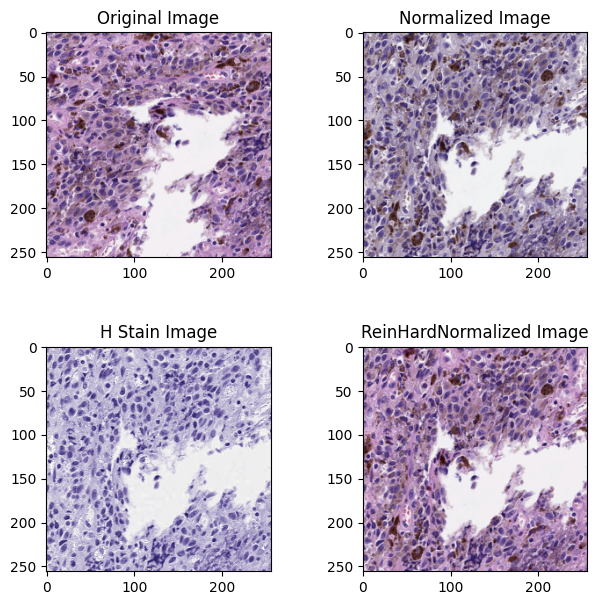

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the normalized tensor to a NumPy array
# The tensor might be in the shape [C, H, W], and we need to change it to [H, W, C]
norm_np = norm.numpy().transpose(1,0,2)
H_norm_np = H.numpy().transpose(1,0,2)
E_norm_np = E.numpy().transpose(1,0,2)
rein_norm_np = rein_norm.numpy().transpose(1,0,2)
a = standardization(norm_np)
norm_np = norm_np / 255.0
target_np = target /255.0



# The pixel values might be in the range [0, 255], we need to scale them back to [0, 1] for displaying

H_norm_np = H_norm_np /255.0
E_norm_np = E_norm_np / 255.0
rein_norm_np = rein_norm_np

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# 첫째 줄
axs[0, 0].imshow(resized_img)
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(norm_np)
axs[0, 1].set_title('Normalized Image')

# 둘째 줄
axs[1, 0].imshow(H_norm_np)
axs[1, 0].set_title('H Stain Image')

axs[1, 1].imshow(rein_norm_np)
axs[1, 1].set_title('ReinHardNormalized Image')

# 이미지 간 간격 조절
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# 결과 표시
plt.show()
# Display the image
# plt.imshow(norm_np)
# plt.title('Normalized Image')
# plt.axis('off')  # Turn off axis numbers and labels
# plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the normalized tensor to a NumPy array
# The tensor might be in the shape [C, H, W], and we need to change it to [H, W, C]
norm_np = H.numpy().transpose(1,0,2)

# The pixel values might be in the range [0, 255], we need to scale them back to [0, 1] for displaying
norm_np = norm_np / 255.0

# norm_np.reshape((100,100,3))
# Display the image
plt.imshow(norm_np)
plt.title('H Image')
plt.axis('off')  # Turn off axis numbers and labels
plt.show()

In [57]:
def normalize_histogram(histogram):
    total_pixels = np.sum(histogram)
    normalized_histogram = histogram / total_pixels
    return normalized_histogram

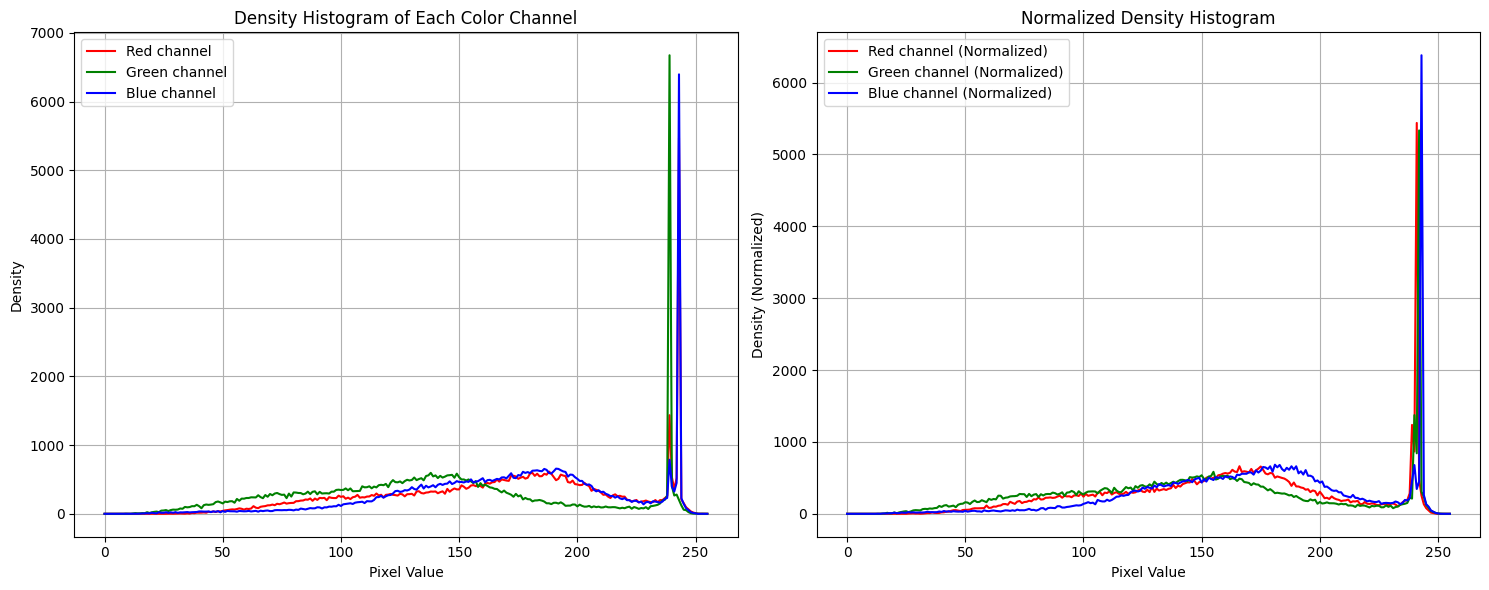

In [135]:
image = target_np
normalized_image = norm_np



histograms_original = [np.histogram(image[:, :, i].flatten(), bins=256,range=[0, 1])[0] for i in range(3)]
colors = ['red', 'green', 'blue']

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

for i in range(3):
    plt.plot(histograms_original[i], color=colors[i], label=f'{colors[i].capitalize()} channel')

plt.title('Density Histogram of Each Color Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
# plt.show()

histograms_normalized = [np.histogram(normalized_image[:, :, i].flatten(), bins=256,range=[0, 1])[0] for i in range(3)]

plt.subplot(1, 2, 2)
for i in range(3):
    plt.plot(histograms_normalized[i], color=colors[i], label=f'{colors[i].capitalize()} channel (Normalized)')
plt.title('Normalized Density Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Density (Normalized)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

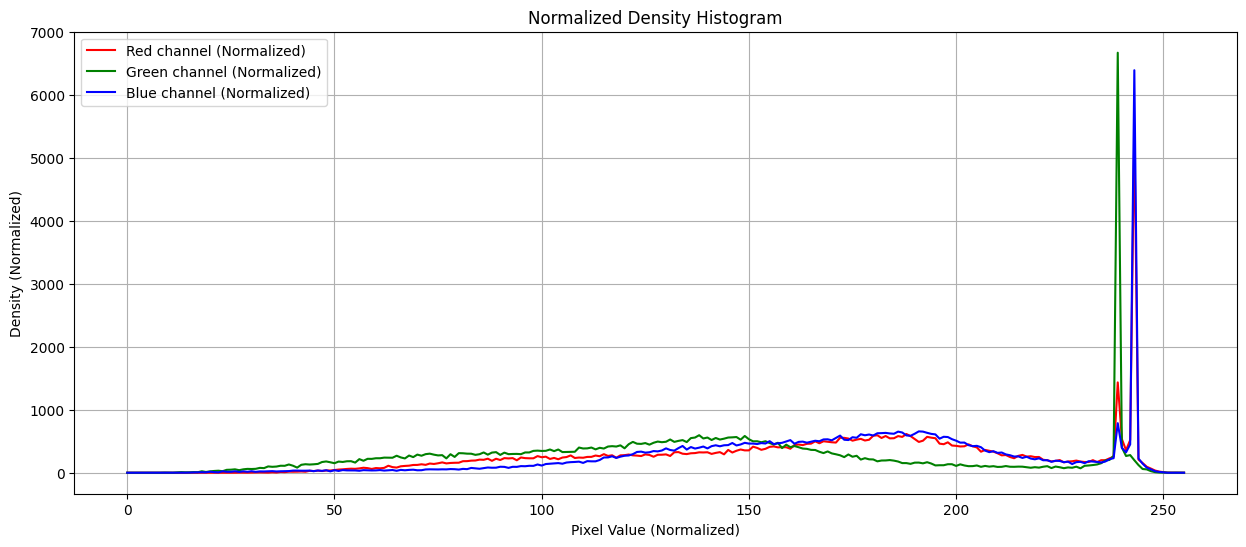

In [92]:
image = target

# 이미지 정규화
normalized_image = image / 255.0  # 0에서 1로 정규화

# 각 채널에 대한 밀도 히스토그램 계산
histograms_normalized = [np.histogram(normalized_image[:, :, i].flatten(), bins=256, range=[0, 1])[0] for i in range(3)]

# 히스토그램 시각화
colors = ['red', 'green', 'blue']

plt.figure(figsize=(15, 6))

# 정규화된 히스토그램 시각화
for i in range(3):
    plt.plot(histograms_normalized[i], color=colors[i], label=f'{colors[i].capitalize()} channel (Normalized)')
plt.title('Normalized Density Histogram')
plt.xlabel('Pixel Value (Normalized)')
plt.ylabel('Density (Normalized)')
plt.legend()
plt.grid(True)

plt.show()